## Random Forest - composite sensors - 2bins - 50/50

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import pycm
from ast import literal_eval
import sys
sys.path.append("../plotutils/")
from plotutils import *
plt.style.use("../plotutils/your.mplstyle")

In [2]:
df = pd.read_csv(f"../DetectionResponseSensors_dataset.csv", sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sensor_type         56 non-null     object 
 1   ZnO_content         56 non-null     int64  
 2   temperature         56 non-null     int64  
 3   sensing             56 non-null     float64
 4   sensing_2bins_7030  56 non-null     int64  
 5   sensing_2bins_5050  56 non-null     int64  
 6   sensor_conds        56 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 3.2+ KB


In [3]:
df["sensor_type"].unique()

array(['core-shell', 'composite'], dtype=object)

In [4]:
target = "sensing_2bins_5050"
representation = ["sensor_type", "ZnO_content", "temperature"]
random_state=42
train_size=40

In [5]:
encoded_sensor_type = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoded_sensor_type.fit_transform(df[["sensor_type"]])
df = pd.concat([df, one_hot_encoded], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sensor_type             56 non-null     object 
 1   ZnO_content             56 non-null     int64  
 2   temperature             56 non-null     int64  
 3   sensing                 56 non-null     float64
 4   sensing_2bins_7030      56 non-null     int64  
 5   sensing_2bins_5050      56 non-null     int64  
 6   sensor_conds            56 non-null     object 
 7   sensor_type_composite   56 non-null     float64
 8   sensor_type_core-shell  56 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.1+ KB


In [7]:
df.columns[7:9].to_list()

['sensor_type_composite', 'sensor_type_core-shell']

In [8]:
representation = ["ZnO_content", "temperature"]
representation.extend(df.columns[7:9].to_list())

In [9]:
representation

['ZnO_content',
 'temperature',
 'sensor_type_composite',
 'sensor_type_core-shell']

In [17]:
def prepare_dataset_classification(
    df,
    target = "sensing_2bins_5050",
    representation=representation,
    random_state=42,
    train_size=40
):
    df_train, df_test = train_test_split(
        df,
        train_size=train_size,
        random_state=random_state,
        stratify=df[target].astype(int).values,
    )
    print(len(df_train), len(df_test))
    
    X_train, y_train = df_train[representation], df_train[target]
    X_test, y_test = df_test[representation], df_test[target]
    
    return X_train, y_train, X_test, y_test

In [18]:
def train_and_evaluate_classifier(X_train, y_train, X_test, y_test, random_state=42):
    clf = RandomForestClassifier(
        n_estimators=200, 
        random_state=random_state,
        verbose=True
    )
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_test = np.array(y_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_micro = f1_score(y_test, y_pred, average="micro")
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)
    
    return y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa

In [19]:
def metrics_dict():
    metrics_dict = {
        "train_size": train_size,
        "y_true": y_test_all,
        "y_pred": y_pred_all,
        "accuracy": acc_scores,
        "f1_macro": f1macro_scores,
        "f1_micro": f1micro_scores,
        "f1_weighted": f1weighted_scores,
        "kappa": kappa_scores
    }
    return metrics_dict

### training size = 15

In [20]:
train_size = 15
iterations = 10
target = "sensing_2bins_5050"
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [21]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        target,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
15 41
random_state = 42
Accuracy: 0.8048780487804879
F1 macro: 0.8038277511961722
F1 micro: 0.8048780487804879
F1 weighted: 0.8034776520014003
Kappa: 0.6113744075829384
-------------Iteration 2/10
15 41
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8048780487804879
F1 macro: 0.7990196078431373
F1 micro: 0.8048780487804879
F1 weighted: 0.7981826877092301
Kappa: 0.6132075471698113
-------------Iteration 3/10
15 41
random_state = 44
Accuracy: 0.7560975609756098
F1 macro: 0.7547846889952152
F1 micro: 0.7560975609756098
F1 weighted: 0.7552223129886801
Kappa: 0.5107398568019093
-------------Iteration 4/10
15 41
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7804878048780488
F1 macro: 0.7799642218246869
F1 micro: 0.7804878048780488
F1 weighted: 0.7802260133513679
Kappa: 0.5601907032181168
-------------Iteration 5/10
15 41
random_state = 46
Accuracy: 0.7560975609756098
F1 macro: 0.7559523809523809
F1 micro: 0.7560975609756098
F1 weighted: 0.7560975609756098
Kappa: 0.5119047619047619
-------------Iteration 6/10
15 41
random_state = 47


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8048780487804879
F1 macro: 0.8047619047619048
F1 micro: 0.8048780487804879
F1 weighted: 0.8046457607433216
Kappa: 0.6104513064133017
-------------Iteration 7/10
15 41
random_state = 48
Accuracy: 0.8048780487804879
F1 macro: 0.8019323671497585
F1 micro: 0.8048780487804879
F1 weighted: 0.8025215034759045
Kappa: 0.6076555023923444
-------------Iteration 8/10
15 41
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7317073170731707
F1 macro: 0.7317073170731707
F1 micro: 0.7317073170731707
F1 weighted: 0.7317073170731707
Kappa: 0.4637336504161712
-------------Iteration 9/10
15 41
random_state = 50
Accuracy: 0.8048780487804879
F1 macro: 0.8019323671497585
F1 micro: 0.8048780487804879
F1 weighted: 0.8013432308236125
Kappa: 0.6122931442080378
-------------Iteration 10/10
15 41
random_state = 51
Accuracy: 0.7804878048780488
F1 macro: 0.7783783783783784
F1 micro: 0.7804878048780488
F1 weighted: 0.7789057350032961
Kappa: 0.5591397849462365


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [22]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 15
mean accuracy: 0.7829268292682927 +/- 0.025464162216855022
mean F1 macro: 0.7812260985324564 +/- 0.024573557883306178
mean F1 micro: 0.7829268292682927 +/- 0.025464162216855022
mean F1 weighted: 0.7812329774145594 +/- 0.024403821777211936
mean Kappa: 0.5660690665053629 +/- 0.05163399204137207


In [23]:
compiled_res_15 = pd.DataFrame(metrics_dict())
compiled_res_15.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, ...","[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, ...",0.804878,0.803828,0.804878,0.803478,0.611374
1,15,"[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, ...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.804878,0.799020,0.804878,0.798183,0.613208
2,15,"[1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, ...","[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...",0.756098,0.754785,0.756098,0.755222,0.510740


### training size = 20

In [24]:
train_size = 20
iterations = 10
target = "sensing_2bins_5050"
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [25]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        target,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
20 36
random_state = 42
Accuracy: 0.8055555555555556
F1 macro: 0.7979149959903769
F1 micro: 0.8055555555555556
F1 weighted: 0.7979149959903769
Kappa: 0.6111111111111112
-------------Iteration 2/10
20 36
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7222222222222222
F1 macro: 0.7077922077922079
F1 micro: 0.7222222222222222
F1 weighted: 0.7077922077922079
Kappa: 0.4444444444444444
-------------Iteration 3/10
20 36
random_state = 44
Accuracy: 0.7777777777777778
F1 macro: 0.7770897832817337
F1 micro: 0.7777777777777778
F1 weighted: 0.7770897832817337
Kappa: 0.5555555555555556
-------------Iteration 4/10
20 36
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8333333333333334
F1 macro: 0.8285714285714285
F1 micro: 0.8333333333333334
F1 weighted: 0.8285714285714286
Kappa: 0.6666666666666667
-------------Iteration 5/10
20 36
random_state = 46
Accuracy: 0.7777777777777778
F1 macro: 0.7770897832817337
F1 micro: 0.7777777777777778
F1 weighted: 0.7770897832817337
Kappa: 0.5555555555555556
-------------Iteration 6/10
20 36
random_state = 47


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7222222222222222
F1 macro: 0.7077922077922079
F1 micro: 0.7222222222222222
F1 weighted: 0.7077922077922079
Kappa: 0.4444444444444444
-------------Iteration 7/10
20 36
random_state = 48
Accuracy: 0.8055555555555556
F1 macro: 0.8017309205350118
F1 micro: 0.8055555555555556
F1 weighted: 0.8017309205350117
Kappa: 0.6111111111111112
-------------Iteration 8/10
20 36
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8611111111111112
F1 macro: 0.8610038610038611
F1 micro: 0.8611111111111112
F1 weighted: 0.861003861003861
Kappa: 0.7222222222222222
-------------Iteration 9/10
20 36
random_state = 50


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7777777777777778
F1 macro: 0.775
F1 micro: 0.7777777777777778
F1 weighted: 0.7749999999999999
Kappa: 0.5555555555555556
-------------Iteration 10/10
20 36
random_state = 51
Accuracy: 0.8333333333333334
F1 macro: 0.8328173374613003
F1 micro: 0.8333333333333334
F1 weighted: 0.8328173374613003
Kappa: 0.6666666666666667


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [26]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 20
mean accuracy: 0.7916666666666666 +/- 0.04347909956249593
mean F1 macro: 0.7866802525709862 +/- 0.0474629031831783
mean F1 micro: 0.7916666666666666 +/- 0.04347909956249593
mean F1 weighted: 0.7866802525709862 +/- 0.04746290318317829
mean Kappa: 0.5833333333333333 +/- 0.08695819912499184


In [27]:
compiled_res_20 = pd.DataFrame(metrics_dict())
compiled_res_20.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,20,"[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","[1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, ...",0.805556,0.797915,0.805556,0.797915,0.611111
1,20,"[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, ...","[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, ...",0.722222,0.707792,0.722222,0.707792,0.444444
2,20,"[1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, ...","[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, ...",0.777778,0.777090,0.777778,0.777090,0.555556


### training size = 25

In [28]:
train_size = 25
iterations = 10
target = "sensing_2bins_5050"
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [29]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        target,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
25 31
random_state = 42
Accuracy: 0.8064516129032258
F1 macro: 0.8046218487394958
F1 micro: 0.8064516129032258
F1 weighted: 0.8040119273515857
Kappa: 0.615702479338843
-------------Iteration 2/10
25 31
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.7419354838709677
F1 macro: 0.7416666666666667
F1 micro: 0.7419354838709677
F1 weighted: 0.7419354838709677
Kappa: 0.4833333333333334
-------------Iteration 3/10
25 31
random_state = 44


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.9032258064516129
F1 macro: 0.9032258064516129
F1 micro: 0.9032258064516129
F1 weighted: 0.9032258064516129
Kappa: 0.8066528066528067
-------------Iteration 4/10
25 31
random_state = 45
Accuracy: 0.7741935483870968
F1 macro: 0.7703703703703704
F1 micro: 0.7741935483870968
F1 weighted: 0.771326164874552
Kappa: 0.5450733752620545
-------------Iteration 5/10
25 31
random_state = 46


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8387096774193549
F1 macro: 0.8387096774193549
F1 micro: 0.8387096774193549
F1 weighted: 0.8387096774193549
Kappa: 0.6777546777546777
-------------Iteration 6/10
25 31
random_state = 47
Accuracy: 0.967741935483871
F1 macro: 0.967741935483871
F1 micro: 0.967741935483871
F1 weighted: 0.967741935483871
Kappa: 0.9355509355509355
-------------Iteration 7/10
25 31
random_state = 48


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8709677419354839
F1 macro: 0.8697478991596639
F1 micro: 0.8709677419354839
F1 weighted: 0.8701545134182704
Kappa: 0.7405857740585774
-------------Iteration 8/10
25 31
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.7419354838709677
F1 macro: 0.7416666666666667
F1 micro: 0.7419354838709677
F1 weighted: 0.7413978494623656
Kappa: 0.48547717842323646
-------------Iteration 9/10
25 31
random_state = 50
Accuracy: 0.8064516129032258
F1 macro: 0.8012820512820513
F1 micro: 0.8064516129032258
F1 weighted: 0.8002481389578163
Kappa: 0.6172839506172839
-------------Iteration 10/10
25 31
random_state = 51


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8064516129032258
F1 macro: 0.8046218487394958
F1 micro: 0.8064516129032258
F1 weighted: 0.8052317701274058
Kappa: 0.610878661087866


In [30]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 25
mean accuracy: 0.8258064516129032 +/- 0.06797195969582413
mean F1 macro: 0.824365477097925 +/- 0.06851803046865769
mean F1 micro: 0.8258064516129032 +/- 0.06797195969582413
mean F1 weighted: 0.8243983267417804 +/- 0.0685066806178474
mean Kappa: 0.6518293172079614 +/- 0.13588758271308243


In [31]:
compiled_res_25 = pd.DataFrame(metrics_dict())
compiled_res_25.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,25,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, ...","[1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...",0.806452,0.804622,0.806452,0.804012,0.615702
1,25,"[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, ...","[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, ...",0.741935,0.741667,0.741935,0.741935,0.483333
2,25,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, ...","[1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, ...",0.903226,0.903226,0.903226,0.903226,0.806653


### training size = 30

In [32]:
train_size = 30
iterations = 10
target = "sensing_2bins_5050"
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [33]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        target,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
30 26
random_state = 42
Accuracy: 0.8846153846153846
F1 macro: 0.8844444444444444
F1 micro: 0.8846153846153846
F1 weighted: 0.8844444444444444
Kappa: 0.7692307692307692
-------------Iteration 2/10
30 26
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8846153846153846
F1 macro: 0.8830584707646176
F1 micro: 0.8846153846153846
F1 weighted: 0.8830584707646177
Kappa: 0.7692307692307692
-------------Iteration 3/10
30 26
random_state = 44


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.9230769230769231
F1 macro: 0.9226190476190477
F1 micro: 0.9230769230769231
F1 weighted: 0.9226190476190476
Kappa: 0.8461538461538461
-------------Iteration 4/10
30 26
random_state = 45
Accuracy: 0.8076923076923077
F1 macro: 0.8003072196620584
F1 micro: 0.8076923076923077
F1 weighted: 0.8003072196620585
Kappa: 0.6153846153846154
-------------Iteration 5/10
30 26
random_state = 46


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8461538461538461
F1 macro: 0.8452380952380952
F1 micro: 0.8461538461538461
F1 weighted: 0.8452380952380951
Kappa: 0.6923076923076923
-------------Iteration 6/10
30 26
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.9230769230769231
F1 macro: 0.9230769230769231
F1 micro: 0.9230769230769231
F1 weighted: 0.9230769230769231
Kappa: 0.8461538461538461
-------------Iteration 7/10
30 26
random_state = 48


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8461538461538461
F1 macro: 0.8461538461538461
F1 micro: 0.8461538461538461
F1 weighted: 0.8461538461538461
Kappa: 0.6923076923076923
-------------Iteration 8/10
30 26
random_state = 49
Accuracy: 0.9230769230769231
F1 macro: 0.9226190476190477
F1 micro: 0.9230769230769231
F1 weighted: 0.9226190476190476
Kappa: 0.8461538461538461
-------------Iteration 9/10
30 26
random_state = 50


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8076923076923077
F1 macro: 0.8003072196620584
F1 micro: 0.8076923076923077
F1 weighted: 0.8003072196620585
Kappa: 0.6153846153846154
-------------Iteration 10/10
30 26
random_state = 51
Accuracy: 0.8846153846153846
F1 macro: 0.8844444444444444
F1 micro: 0.8846153846153846
F1 weighted: 0.8844444444444444
Kappa: 0.7692307692307692


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [34]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 30
mean accuracy: 0.873076923076923 +/- 0.04230769230769232
mean F1 macro: 0.8712268758684584 +/- 0.04452347888081485
mean F1 micro: 0.873076923076923 +/- 0.04230769230769232
mean F1 weighted: 0.8712268758684584 +/- 0.044523478880814794
mean Kappa: 0.7461538461538461 +/- 0.08461538461538459


In [35]:
compiled_res_30 = pd.DataFrame(metrics_dict())
compiled_res_30.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,30,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, ...","[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, ...",0.884615,0.884444,0.884615,0.884444,0.769231
1,30,"[1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, ...",0.884615,0.883058,0.884615,0.883058,0.769231
2,30,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, ...","[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",0.923077,0.922619,0.923077,0.922619,0.846154


### training size = 35

In [36]:
train_size = 35
iterations = 10
target = "sensing_2bins_5050"
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [37]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        target,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


-------------Iteration 1/10
35 21
random_state = 42
Accuracy: 0.9523809523809523
F1 macro: 0.9519450800915332
F1 micro: 0.9523809523809523
F1 weighted: 0.9521630162362427
Kappa: 0.904109589041096
-------------Iteration 2/10
35 21
random_state = 43


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8095238095238095
F1 macro: 0.8055555555555556
F1 micro: 0.8095238095238095
F1 weighted: 0.8042328042328043
Kappa: 0.625
-------------Iteration 3/10
35 21
random_state = 44


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.9047619047619048
F1 macro: 0.9045454545454545
F1 micro: 0.9047619047619048
F1 weighted: 0.9047619047619048
Kappa: 0.8090909090909091
-------------Iteration 4/10
35 21
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.7142857142857143
F1 macro: 0.7083333333333333
F1 micro: 0.7142857142857143
F1 weighted: 0.7103174603174602
Kappa: 0.42201834862385323
-------------Iteration 5/10
35 21
random_state = 46


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8095238095238095
F1 macro: 0.8090909090909091
F1 micro: 0.8095238095238095
F1 weighted: 0.8086580086580087
Kappa: 0.6216216216216216
-------------Iteration 6/10
35 21
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.9047619047619048
F1 macro: 0.9045454545454545
F1 micro: 0.9047619047619048
F1 weighted: 0.9047619047619048
Kappa: 0.8090909090909091
-------------Iteration 7/10
35 21
random_state = 48
Accuracy: 0.9523809523809523
F1 macro: 0.9523809523809523
F1 micro: 0.9523809523809523
F1 weighted: 0.9523809523809523
Kappa: 0.9049773755656109
-------------Iteration 8/10
35 21
random_state = 49


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.9047619047619048
F1 macro: 0.9045454545454545
F1 micro: 0.9047619047619048
F1 weighted: 0.9043290043290044
Kappa: 0.8108108108108107
-------------Iteration 9/10
35 21
random_state = 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7619047619047619
F1 macro: 0.7529411764705882
F1 micro: 0.7619047619047619
F1 weighted: 0.7507002801120448
Kappa: 0.5333333333333333
-------------Iteration 10/10
35 21
random_state = 51
Accuracy: 0.9523809523809523
F1 macro: 0.9523809523809523
F1 micro: 0.9523809523809523
F1 weighted: 0.9523809523809523
Kappa: 0.9049773755656109


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [38]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 35
mean accuracy: 0.8666666666666666 +/- 0.08192690730516786
mean F1 macro: 0.8646264322940187 +/- 0.08442839263202155
mean F1 micro: 0.8666666666666666 +/- 0.08192690730516786
mean F1 weighted: 0.8644686288171279 +/- 0.0845176930382389
mean Kappa: 0.7345030272743756 +/- 0.16330585402153103


In [39]:
compiled_res_35 = pd.DataFrame(metrics_dict())
compiled_res_35.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,35,"[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, ...","[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, ...",0.952381,0.951945,0.952381,0.952163,0.904110
1,35,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, ...","[1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, ...",0.809524,0.805556,0.809524,0.804233,0.625000
2,35,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, ...","[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, ...",0.904762,0.904545,0.904762,0.904762,0.809091


### training size = 40

In [40]:
train_size = 40
iterations = 10
target = "sensing_2bins_5050"
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [41]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        target,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
40 16
random_state = 42


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8125
F1 macro: 0.8117647058823529
F1 micro: 0.8125
F1 weighted: 0.8117647058823529
Kappa: 0.625
-------------Iteration 2/10
40 16
random_state = 43
Accuracy: 0.9375
F1 macro: 0.9372549019607843
F1 micro: 0.9375
F1 weighted: 0.9372549019607843
Kappa: 0.875
-------------Iteration 3/10
40 16
random_state = 44


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.875
F1 macro: 0.873015873015873
F1 micro: 0.875
F1 weighted: 0.873015873015873
Kappa: 0.75
-------------Iteration 4/10
40 16
random_state = 45
Accuracy: 0.875
F1 macro: 0.873015873015873
F1 micro: 0.875
F1 weighted: 0.873015873015873
Kappa: 0.75
-------------Iteration 5/10
40 16
random_state = 46


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.875
F1 macro: 0.875
F1 micro: 0.875
F1 weighted: 0.875
Kappa: 0.75
-------------Iteration 6/10
40 16
random_state = 47


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.875
F1 macro: 0.875
F1 micro: 0.875
F1 weighted: 0.875
Kappa: 0.75
-------------Iteration 7/10
40 16
random_state = 48
Accuracy: 0.8125
F1 macro: 0.8117647058823529
F1 micro: 0.8125
F1 weighted: 0.8117647058823529
Kappa: 0.625
-------------Iteration 8/10


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


40 16
random_state = 49
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 9/10
40 16
random_state = 50


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.875
F1 macro: 0.873015873015873
F1 micro: 0.875
F1 weighted: 0.873015873015873
Kappa: 0.75
-------------Iteration 10/10
40 16
random_state = 51
Accuracy: 0.9375
F1 macro: 0.9372549019607843
F1 micro: 0.9375
F1 weighted: 0.9372549019607843
Kappa: 0.875


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [42]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 40
mean accuracy: 0.8875 +/- 0.054486236794258416
mean F1 macro: 0.8867086834733893 +/- 0.054785607666112096
mean F1 micro: 0.8875 +/- 0.054486236794258416
mean F1 weighted: 0.8867086834733893 +/- 0.054785607666112096
mean Kappa: 0.775 +/- 0.10897247358851683


In [43]:
compiled_res_40 = pd.DataFrame(metrics_dict())
compiled_res_40.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,40,"[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0]","[0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0]",0.8125,0.811765,0.8125,0.811765,0.625
1,40,"[0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0]","[0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0]",0.9375,0.937255,0.9375,0.937255,0.875
2,40,"[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0]","[0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]",0.8750,0.873016,0.8750,0.873016,0.750


### training size = 45

In [44]:
train_size = 45
iterations = 10
target = "sensing_2bins_5050"
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [45]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        target,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
45 11
random_state = 42


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.9090909090909091
F1 macro: 0.905982905982906
F1 micro: 0.9090909090909091
F1 weighted: 0.9075369075369075
Kappa: 0.8135593220338984
-------------Iteration 2/10
45 11
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.9090909090909091
F1 macro: 0.9090909090909091
F1 micro: 0.9090909090909091
F1 weighted: 0.9090909090909091
Kappa: 0.819672131147541
-------------Iteration 3/10
45 11
random_state = 44


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.9090909090909091
F1 macro: 0.9090909090909091
F1 micro: 0.9090909090909091
F1 weighted: 0.9090909090909091
Kappa: 0.819672131147541
-------------Iteration 4/10
45 11
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8181818181818182
F1 macro: 0.8035714285714286
F1 micro: 0.8181818181818182
F1 weighted: 0.8084415584415584
Kappa: 0.6206896551724137
-------------Iteration 5/10
45 11
random_state = 46
Accuracy: 0.9090909090909091
F1 macro: 0.905982905982906
F1 micro: 0.9090909090909091
F1 weighted: 0.9075369075369075
Kappa: 0.8135593220338984
-------------Iteration 6/10
45 11
random_state = 47


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.9090909090909091
F1 macro: 0.9090909090909091
F1 micro: 0.9090909090909091
F1 weighted: 0.9090909090909091
Kappa: 0.819672131147541
-------------Iteration 7/10
45 11
random_state = 48
Accuracy: 0.9090909090909091
F1 macro: 0.9090909090909091
F1 micro: 0.9090909090909091
F1 weighted: 0.9090909090909091
Kappa: 0.819672131147541
-------------Iteration 8/10
45 11
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 9/10
45 11
random_state = 50
Accuracy: 0.9090909090909091
F1 macro: 0.9090909090909091
F1 micro: 0.9090909090909091
F1 weighted: 0.9090909090909091
Kappa: 0.819672131147541
-------------Iteration 10/10
45 11
random_state = 51


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.9090909090909091
F1 macro: 0.9090909090909091
F1 micro: 0.9090909090909091
F1 weighted: 0.9090909090909091
Kappa: 0.819672131147541


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [46]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 45
mean accuracy: 0.909090909090909 +/- 0.04065578140908708
mean F1 macro: 0.9070082695082693 +/- 0.044016779833769434
mean F1 micro: 0.909090909090909 +/- 0.04065578140908708
mean F1 weighted: 0.9078060828060825 +/- 0.04287549026179313
mean Kappa: 0.8165841086125457 +/- 0.08490673711126522


In [47]:
compiled_res_45 = pd.DataFrame(metrics_dict())
compiled_res_45.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,45,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]","[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]",0.909091,0.905983,0.909091,0.907537,0.813559
1,45,"[1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]","[1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1]",0.909091,0.909091,0.909091,0.909091,0.819672
2,45,"[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1]","[0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1]",0.909091,0.909091,0.909091,0.909091,0.819672


In [48]:
compiled_res = pd.concat([
    compiled_res_15,
    compiled_res_20,
    compiled_res_25,
    compiled_res_30,
    compiled_res_35,
    compiled_res_40,
    compiled_res_45
], ignore_index=True)
print(len(compiled_res))
compiled_res.head()

70


,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, ...","[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, ...",0.804878,0.803828,0.804878,0.803478,0.611374
1,15,"[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, ...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.804878,0.799020,0.804878,0.798183,0.613208
2,15,"[1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, ...","[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...",0.756098,0.754785,0.756098,0.755222,0.510740
3,15,"[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...",0.780488,0.779964,0.780488,0.780226,0.560191
4,15,"[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, ...","[1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, ...",0.756098,0.755952,0.756098,0.756098,0.511905


In [49]:
compiled_res["y_true"] = compiled_res["y_true"].apply(lambda arr: list(arr))
compiled_res["y_pred"] = compiled_res["y_pred"].apply(lambda arr: list(arr))

In [50]:
compiled_res.to_csv("RF_results_compSensors_2bins_5050.csv", sep=",", index=False)

In [51]:
df = pd.read_csv("RF_results_compSensors_2bins_5050.csv", sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   train_size   70 non-null     int64  
 1   y_true       70 non-null     object 
 2   y_pred       70 non-null     object 
 3   accuracy     70 non-null     float64
 4   f1_macro     70 non-null     float64
 5   f1_micro     70 non-null     float64
 6   f1_weighted  70 non-null     float64
 7   kappa        70 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 4.5+ KB


In [52]:
df.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, ...","[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, ...",0.804878,0.803828,0.804878,0.803478,0.611374
1,15,"[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, ...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.804878,0.799020,0.804878,0.798183,0.613208
2,15,"[1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, ...","[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...",0.756098,0.754785,0.756098,0.755222,0.510740


In [53]:
grouped_res = df.select_dtypes(include = ["int", "float"]).groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy            f1_macro            f1_micro            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
15          0.782927  0.008488  0.781226  0.008191  0.782927  0.008488   
20          0.791667  0.014493  0.786680  0.015821  0.791667  0.014493   
25          0.825806  0.022657  0.824365  0.022839  0.825806  0.022657   
30          0.873077  0.014103  0.871227  0.014841  0.873077  0.014103   
35          0.866667  0.027309  0.864626  0.028143  0.866667  0.027309   
40          0.887500  0.018162  0.886709  0.018262  0.887500  0.018162   
45          0.909091  0.013552  0.907008  0.014672  0.909091  0.013552   

           f1_weighted               kappa            
                  mean       sem      mean       sem  
train_size                                            
15            0.781233  0.008135  0.566069  0.017211  
20            0.786680  0.015821  0.583333  0.028986  
25            0.824398  0.022836  0.651829  0.045296  
30            0.871227  0.014841  0.746154  0.028205  
35            0.864469  0.028173  0.734503  0.054435  
40            0.886709  0.018262  0.775000  0.036324  
45            0.907806  0.014292  0.816584  0.028302

In [54]:
conf_mats = []
for i in np.arange(len(df)):
    confusion_matrix = {
        'all_y_true': literal_eval(df["y_true"][i]),
        'all_y_pred': literal_eval(df["y_pred"][i])
    }
    conf_mats.append(confusion_matrix)

[[0.85964912 0.14035088]
 [0.03773585 0.96226415]]
accuracy: 0.9090909090909091


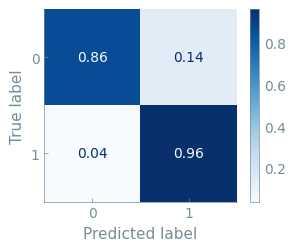

In [55]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]

actual_all, predicted_all = [], []
for index, _ in enumerate(conf_mats_max):
    preds = conf_mats_max[index]
    actual = preds["all_y_true"]
    predicted = preds["all_y_pred"]
    
    for true, pred in zip(actual, predicted):
        actual_all.append(true)
        predicted_all.append(pred)

confusion_matrix = metrics.confusion_matrix(actual_all, predicted_all)
confusion_matrix_norm = confusion_matrix.astype("float") / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_norm)

cm = pycm.ConfusionMatrix(list(actual_all), list(predicted_all))
acc = cm.Overall_ACC

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix_norm, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues, include_values=True, values_format=".2f")
#plt.savefig('classif_compSensors_confusionMatrix_50_50_size45_RF.pdf', bbox_inches='tight')